In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
from scipy.optimize import curve_fit
os.getcwd()

'C:\\Users\\jgage\\Documents\\GitHub\\CHEM274'

In [2]:
data = pd.read_csv('data/testing/OCV to 0.2 100nF 10kOhms.txt', sep=',')
data

,Time (s),WE potential,Rm potential,Rm current
0,0.000,0.278970,0.004292,4.291692e-07
1,0.001,0.279299,0.006594,6.594388e-07
2,0.002,0.279299,0.003305,3.304823e-07
3,0.003,0.278970,0.001660,1.660041e-07
4,0.004,0.278970,-0.001630,-1.629524e-07
...,...,...,...,...
2995,2.995,0.279299,0.128308,1.283083e-05
2996,2.996,0.279299,0.127321,1.273214e-05
2997,2.997,0.278970,0.127650,1.276504e-05
2998,2.998,0.279628,0.128308,1.283083e-05


In [3]:
# In E4, near optimal values of Rm and Cm were:
Rm = 10000
Cm = 100e-9
pstat_time_constant = Rm*Cm

# From Fe(acac)3 data in wet MeCN, Ru and Cdl were approximately:
Ru = 530
Cdl = 4.58e-6
cell_time_constant = Ru*Cdl

In [21]:
pot_step_time = 1 # step time start in s
pot_rest_time = 2 # rest time start in s

# For both of these capacitors to charge, we should ignore data before at least 5τ of each:
fit_start_time = pot_step_time + (5 * (cell_time_constant + pstat_time_constant))

# Fit until 5 ms before the rest step
fit_times = data[data['Time (s)'].between(fit_start_time, pot_rest_time - 0.005)]['Time (s)'].to_numpy()
fit_currents = data[data['Time (s)'].between(fit_start_time, pot_rest_time - 0.005)]['Rm current'].to_numpy()

fit_times_no_offset = fit_times - pot_step_time
# print(fit_times_no_offset)

In [17]:
def Emperical_Cottrell(t, a):
    return a / np.sqrt(t)

In [29]:
guess_prefactor = .009
fit_prefactor, cov = curve_fit(Emperical_Cottrell, fit_times_no_offset, fit_currents, guess_prefactor)
print('a = {0:.3E}'.format(fit_prefactor[0]))

a = -4.334E-05


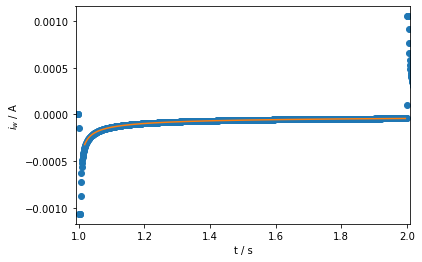

In [22]:
fig, ax = plt.subplots()
ax.scatter(data['Time (s)'], data['Rm current'])
ax.set_ylabel('$i_w$ / A')
ax.set_xlabel('t / s')
ax.set_xlim(.99, 2.01)

ax.plot(fit_times, Emperical_Cottrell(fit_times_no_offset, fit_prefactor), color="C1", zorder=1)